In [10]:
from mediapipe import solutions
from mediapipe.framework.formats import landmark_pb2
import numpy as np


def draw_landmarks_on_image(rgb_image, detection_result):
  pose_landmarks_list = detection_result.pose_landmarks
  annotated_image = np.copy(rgb_image)

  # Loop through the detected poses to visualize.
  for idx in range(len(pose_landmarks_list)):
    pose_landmarks = pose_landmarks_list[idx]

    # Draw the pose landmarks.
    pose_landmarks_proto = landmark_pb2.NormalizedLandmarkList()
    pose_landmarks_proto.landmark.extend([
      landmark_pb2.NormalizedLandmark(x=landmark.x, y=landmark.y, z=landmark.z) for landmark in pose_landmarks
    ])
    solutions.drawing_utils.draw_landmarks(
      annotated_image,
      pose_landmarks_proto,
      solutions.pose.POSE_CONNECTIONS,
      solutions.drawing_styles.get_default_pose_landmarks_style())
  return annotated_image

In [1]:
import mediapipe as mp
from mediapipe.tasks import python
from mediapipe.tasks.python import vision

In [6]:
model_path = 'pose_landmarker_heavy.task'
base_options = python.BaseOptions(model_asset_path=model_path)
options = vision.PoseLandmarkerOptions(
    base_options=base_options,
    output_segmentation_masks=True)
detector = vision.PoseLandmarker.create_from_options(options)
# STEP 3: Load the input image.
image = mp.Image.create_from_file("samples/girl.jpg")

# STEP 4: Detect pose landmarks from the input image.
detection_result = detector.detect(image)

In [11]:
annotated_image = draw_landmarks_on_image(image.numpy_view(), detection_result)

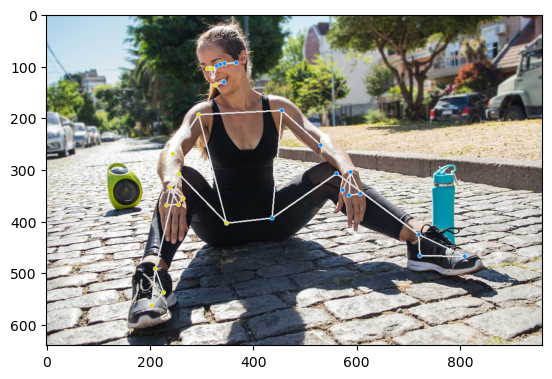

In [12]:
plt.imshow(annotated_image)

In [4]:
detection_result

PoseLandmarkerResult(pose_landmarks=[[NormalizedLandmark(x=0.3460294008255005, y=0.1966361701488495, z=-0.22667907178401947, visibility=0.9999703168869019, presence=0.9999858140945435), NormalizedLandmark(x=0.3515947461128235, y=0.16760265827178955, z=-0.20938999950885773, visibility=0.9999570846557617, presence=0.9999645948410034), NormalizedLandmark(x=0.358296662569046, y=0.16381791234016418, z=-0.20952509343624115, visibility=0.9999513626098633, presence=0.9999685287475586), NormalizedLandmark(x=0.3657074272632599, y=0.15991654992103577, z=-0.20966629683971405, visibility=0.9999492168426514, presence=0.9999676942825317), NormalizedLandmark(x=0.3367636799812317, y=0.17543131113052368, z=-0.1973298341035843, visibility=0.99993896484375, presence=0.9999548196792603), NormalizedLandmark(x=0.3328719139099121, y=0.17719238996505737, z=-0.19739419221878052, visibility=0.9999129772186279, presence=0.9999511241912842), NormalizedLandmark(x=0.3296092748641968, y=0.17845553159713745, z=-0.1974

In [25]:
detection_result.pose_landmarks[0][0]

NormalizedLandmark(x=0.33686065673828125, y=0.18984439969062805, z=-0.146661639213562, visibility=0.9999998807907104, presence=0.9999998807907104)

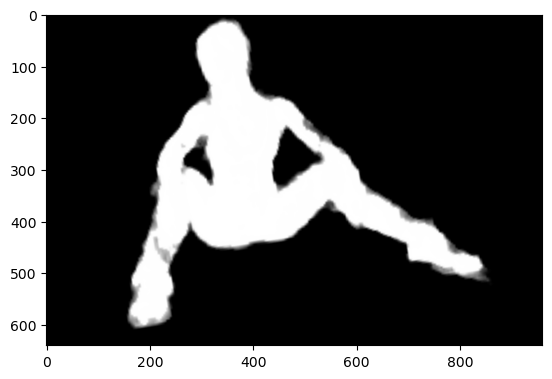

In [7]:
import matplotlib.pyplot as plt
import numpy as np
segmentation_mask = detection_result.segmentation_masks[0].numpy_view()
visualized_mask = np.repeat(segmentation_mask[:, :, np.newaxis], 3, axis=2) * 255
plt.imshow(visualized_mask.astype(np.uint8))

In [9]:
detection_result.pose_world_landmarks

[[Landmark(x=-0.15915951132774353, y=-0.5357077121734619, z=-0.21402853727340698, visibility=0.9999998807907104, presence=0.9999998807907104),
  Landmark(x=-0.1345924437046051, y=-0.567797839641571, z=-0.2124875783920288, visibility=0.9999997615814209, presence=0.9999998807907104),
  Landmark(x=-0.1306857168674469, y=-0.5671626329421997, z=-0.20663988590240479, visibility=0.9999996423721313, presence=0.9999998807907104),
  Landmark(x=-0.13169869780540466, y=-0.5689961910247803, z=-0.208962082862854, visibility=0.9999996423721313, presence=0.9999997615814209),
  Landmark(x=-0.15391767024993896, y=-0.5752313137054443, z=-0.21474754810333252, visibility=0.9999997615814209, presence=0.9999997615814209),
  Landmark(x=-0.1530335247516632, y=-0.5732914805412292, z=-0.2228783667087555, visibility=0.9999997615814209, presence=0.9999997615814209),
  Landmark(x=-0.14714321494102478, y=-0.5645168423652649, z=-0.2044440507888794, visibility=0.9999997615814209, presence=0.9999997615814209),
  Landma